In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from sklearn import linear_model
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb  
import matplotlib.pyplot as plt

In [10]:
# import vehicules 
dfVehi2020 = pd.read_csv('data/DataSource/vehicules-2020.csv', sep = ';')
dfVehi2019 = pd.read_csv('data/DataSource/vehicules-2019.csv', sep = ';')


# import usager 
dfUsag2020 = pd.read_csv('data/DataSource/usagers-2020.csv', sep = ';')
dfUsag2019 = pd.read_csv('data/DataSource/usagers-2019.csv', sep = ';')


# import lieu 
dfLieux2020 = pd.read_csv('data/DataSource/lieux-2020.csv', sep = ';')
dfLieux2019 = pd.read_csv('data/DataSource/lieux-2019.csv', sep = ';')


# import Caractéristique 
dfCara2020 = pd.read_csv('data/DataSource/caracteristiques-2020.csv', sep = ';')
dfCara2019 = pd.read_csv('data/DataSource/caracteristiques-2019.csv', sep = ';')

# import Caractéristique 
dfImmat2020 = pd.read_csv('data/DataSource/2020.csv', sep = ';')
dfImmat2019 = pd.read_csv('data/DataSource/2019.csv', sep = ';')

In [11]:
dfVehi = pd.concat([dfVehi2020, dfVehi2019], axis = 0)
dfUsag = pd.concat([dfUsag2020, dfUsag2019], axis = 0)
dfLieux = pd.concat([dfLieux2020, dfLieux2019], axis = 0)
dfCara = pd.concat([dfCara2020, dfCara2019], axis = 0)
dfImmat = pd.concat([dfImmat2020, dfImmat2019], axis = 0)

df1 = pd.merge(dfUsag, dfVehi, left_on=['Num_Acc', 'id_vehicule', 'num_veh' ], right_on=['Num_Acc', 'id_vehicule', 'num_veh' ])
df2 = pd.merge(df1, dfLieux, left_on=['Num_Acc' ], right_on=['Num_Acc'])

all_content = pd.merge(df2, dfCara, left_on=['Num_Acc'], right_on=['Num_Acc'])

In [12]:
all_content_dr = all_content.drop(["voie","v1","v2","pr","pr1",
                                   "lartpc","larrout","com","adr","lat","long",
                                   "senc", "occutc","vma"], axis = 1)

all_content_dr['Num_Acc'] = all_content_dr['Num_Acc'].astype(str)
all_content_dr['id_vehicule'] = all_content_dr['id_vehicule'].astype(str)
all_content_dr['num_veh']  = all_content_dr['num_veh'].astype(str)

all_content_dr.index = all_content_dr['Num_Acc'] + ' - '+ all_content_dr['id_vehicule'] +' - ' + all_content_dr['num_veh']
all_content_dr = all_content_dr.drop(["Num_Acc","id_vehicule",	"num_veh"], axis = 1)

In [13]:
all_content_dr['dep'] = all_content_dr['dep'].replace(['2B','2A'],[111,110])
all_content_dr['actp'] = all_content_dr['actp'].replace(['A','B'],[10,0])
all_content_dr['dep'] = all_content_dr['dep'].astype(int)
all_content_dr['actp'] = all_content_dr['actp'].astype(int)

In [14]:
all_content_dr = all_content_dr.drop(["hrmn"], axis = 1)

In [15]:
all_content_dr['AgeUsag'] = all_content_dr['an'] - all_content_dr['an_nais']
all_content_dr = all_content_dr.drop(["an_nais","an"], axis = 1)

In [16]:
all_content_dr['AgeUsag'] = pd.cut(all_content_dr['AgeUsag'], bins = [0,18,25,35,45,55,65, 110], labels =[0,1,2,3,4,5,6])

In [17]:
all_content_dr['AgeUsag'].value_counts()

2    49183
1    44806
3    37279
4    33663
0    25544
6    23876
5    23377
Name: AgeUsag, dtype: int64

In [18]:
all_content_dr['circ'] = all_content_dr['circ'].replace(-1, 2)
all_content_dr['prof'] = all_content_dr['prof'].replace(-1, 1)
all_content_dr['plan'] = all_content_dr['plan'].replace(-1, 1)
all_content_dr['surf'] = all_content_dr['surf'].replace(-1, 1)
all_content_dr = all_content_dr.replace(-1, 0)

In [19]:
all_content_dr['grav'] = all_content_dr['grav'].replace([2, 3], 0)
all_content_dr['grav'] = all_content_dr['grav'].replace([1, 4], 1)

In [20]:
all_content_dr = all_content_dr.dropna()
all_content_dr['AgeUsag']= all_content_dr['AgeUsag'].astype(int)
all_content_dr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237728 entries, 202000000001 - 154 742 274 - B01 to 201900058840 - 137 982 130 - A01
Data columns (total 35 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   place    237728 non-null  int64
 1   catu     237728 non-null  int64
 2   grav     237728 non-null  int64
 3   sexe     237728 non-null  int64
 4   trajet   237728 non-null  int64
 5   secu1    237728 non-null  int64
 6   secu2    237728 non-null  int64
 7   secu3    237728 non-null  int64
 8   locp     237728 non-null  int64
 9   actp     237728 non-null  int32
 10  etatp    237728 non-null  int64
 11  catv     237728 non-null  int64
 12  obs      237728 non-null  int64
 13  obsm     237728 non-null  int64
 14  choc     237728 non-null  int64
 15  manv     237728 non-null  int64
 16  motor    237728 non-null  int64
 17  catr     237728 non-null  int64
 18  circ     237728 non-null  int64
 19  nbv      237728 non-null  int64
 20  vosp     237728 no

In [21]:
target = all_content_dr['grav']
data = all_content_dr.drop('grav', axis = 1)

In [22]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


#Oversampling aléatoire
ros = RandomOverSampler()
#SMOTE
smo = SMOTE()

#Random Undersampling
rus = RandomUnderSampler()
#Centroids
cc = ClusterCentroids()


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


X_train, y_train = rus.fit_resample(X_train, y_train)
    
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)



0.7100281832330796

Feature 0: 3944.679947
Feature 1: 272.852762
Feature 2: 33.549061
Feature 3: 574.720344
Feature 4: 395.266977
Feature 5: 147.521173
Feature 6: 6107.394868
Feature 7: 3108.832241
Feature 8: 3598.558501
Feature 9: 1212.598637
Feature 10: 9977.767795
Feature 11: 22537.599278
Feature 12: 2348.689470
Feature 13: 888.405185
Feature 14: 1984.668028
Feature 15: 188.455056
Feature 16: 15.468671
Feature 17: 12.102086
Feature 18: 791.497243
Feature 19: 442.615161
Feature 20: 106.538487
Feature 21: 481.998726
Feature 22: 30.014373
Feature 23: 7.318505
Feature 24: 1887.371893
Feature 25: 24.970975
Feature 26: 0.013601
Feature 27: 0.556906
Feature 28: 3967.489070
Feature 29: 466.505748
Feature 30: 531.332294
Feature 31: 65.394561
Feature 32: 1368.266225
Feature 33: 426.285919


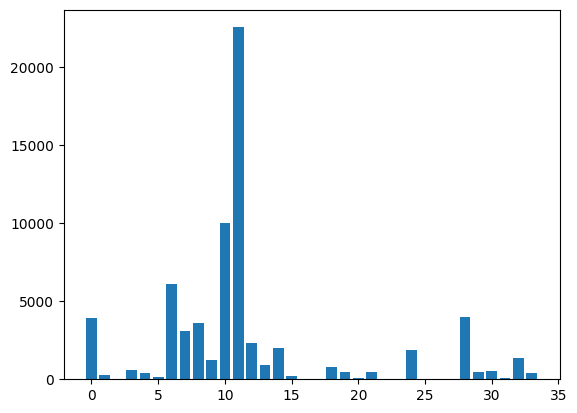

In [23]:
rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=5)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [24]:
model = ensemble.RandomForestClassifier()

model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)

cross = pd.crosstab(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))
cross

Accuracy: 74.53


col_0,0,1
grav,,
0,6301,2409
1,9701,29135


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

bclf = BalancedRandomForestClassifier()
bclf.fit(X_train, y_train) 

y_pred = bclf.predict(X_test)
pd.crosstab(y_test, y_pred)

cross = pd.crosstab(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

cross

Accuracy: 77.48


col_0,0,1
grav,,
0,7331,1349
1,9359,29507


In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

model = ensemble.RandomForestClassifier(class_weight= "balanced")
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
pd.crosstab(y_test, y_pred)

cross = pd.crosstab(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

cross

Accuracy: 85.22


col_0,0,1
grav,,
0,3417,5265
1,1761,37103


In [22]:

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=5)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)



model = ensemble.RandomForestClassifier(class_weight= "balanced")

model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)

cross = pd.crosstab(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

cross

Accuracy: 73.66


col_0,0,1
grav,,
0,5972,2850
1,9672,29052


In [23]:
model = DecisionTreeClassifier(criterion ='entropy', max_depth=13)


model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 82.45


Feature 0: 0.015507
Feature 1: 0.022416
Feature 2: 0.017618
Feature 3: 0.019208
Feature 4: 0.046636
Feature 5: 0.015598
Feature 6: 0.004570
Feature 7: 0.007817
Feature 8: 0.005857
Feature 9: 0.005764
Feature 10: 0.031147
Feature 11: 0.021907
Feature 12: 0.038121
Feature 13: 0.016692
Feature 14: 0.022012
Feature 15: 0.020585
Feature 16: 0.027913
Feature 17: 0.024452
Feature 18: 0.022452
Feature 19: 0.000890
Feature 20: 0.019575
Feature 21: 0.026324
Feature 22: 0.017358
Feature 23: 0.001976
Feature 24: 0.036910
Feature 25: 0.000567
Feature 26: 0.003400
Feature 27: 0.016196
Feature 28: 0.040961
Feature 29: 0.030459
Feature 30: 0.011536
Feature 31: 0.014504
Feature 32: 0.034337
Feature 33: 0.009373


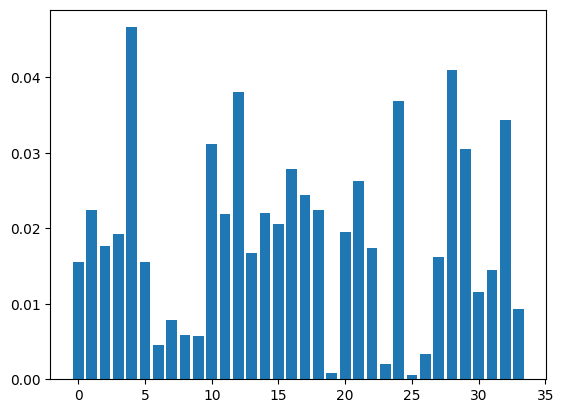

In [24]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=9)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [25]:
model = ensemble.RandomForestClassifier(criterion = 'gini', max_depth = 11, max_features = 'auto', n_estimators = 200)

model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

feats = {}
for feature, importance in zip(data.columns, model.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(9)


c:\Users\girar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 84.45


,Importance
place,0.232465
secu3,0.150422
catu,0.133835
actp,0.116627
sexe,0.107592
trajet,0.092180
locp,0.078778
secu2,0.072190
secu1,0.015911


In [26]:
model = DecisionTreeClassifier(criterion ='gini', max_depth=13)


model.fit(X_train_fs, y_train)

y_pred = model.predict(X_test_fs)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

feats = {}
for feature, importance in zip(data.columns, model.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(9)

Accuracy: 83.94


,Importance
place,0.246219
secu3,0.189228
sexe,0.133735
actp,0.084531
catu,0.083478
trajet,0.083188
locp,0.080555
secu2,0.080232
secu1,0.018834


81.44533714718378
81.77975013670972
82.13309216337862
82.55373743322257
82.59790518655618
83.38451184116434
83.71261515164262
83.82829260084971
84.03440878307323
83.97341521894587
84.0848862154545
83.96079586085054
83.92083456021537
83.7946409792622


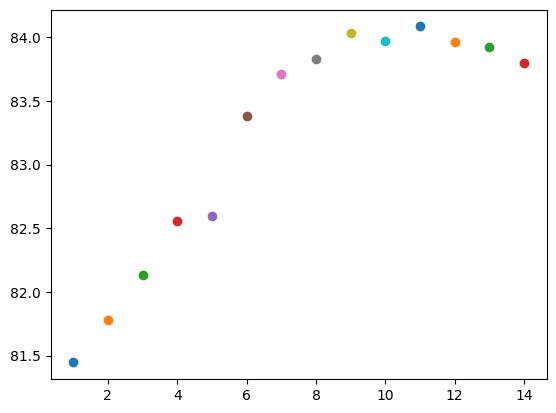

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

for i in range(1,15):
    tree = DecisionTreeClassifier(criterion='gini',max_depth=i)  
    tree .fit(X_train_fs, y_train) 
    y_pred =tree .predict(X_test_fs)
    score = accuracy_score(y_test, y_pred)
# kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
# score = cross_val_score(tree, X, y, cv=kfold)
    mean=score.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [31]:
param_grid = {'n_estimators': [200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [11],
    'criterion' :['gini', 'entropy'] }


model = ensemble.RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_fs, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'sqrt',
 'n_estimators': 200}